In [2]:
%pylab inline
import numpy as np
from riboraptor.coherence import coherence
# sig1, sig2 = your audio signals
# ...
sig1 = [3,4,5, 3,4,5]
sig2 = [1,0,0, 1,0,0]
fft_sig1 = np.fft.fft(sig1)
fft_sig2 = np.fft.fft(sig2)
fft_sig2_conj = np.conj(fft_sig2)

R = (fft_sig1 * fft_sig2_conj) / abs(fft_sig1 * fft_sig2_conj)
r = np.fft.ifft(R)

time_shift = np.argmax(r)

Populating the interactive namespace from numpy and matplotlib


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide


In [13]:
coherence([5, 6,5, 5,6,5])

(1.0, 0.12338144785482641, 6)

In [15]:
coherence([0, 1,0, 0,1,0, 1, 0, 0])

(0.75, 0.2249847087903062, 6)

In [2]:
time_shift

0

In [75]:
np.sin(-2*np.pi/3)

-0.8660254037844387

In [77]:
4/(np.pi)**2

0.4052847345693511

In [4]:
fft_sig1

array([24.+0.j        ,  0.+0.j        , -3.+1.73205081j,  0.+0.j        ,
       -3.-1.73205081j,  0.+0.j        ])

In [5]:
fft_sig2

array([2.+0.j, 0.+0.j, 2.+0.j, 0.+0.j, 2.+0.j, 0.+0.j])

In [6]:
import numpy as np
import scipy.stats as st

alpha = 0.05
p = 1 - alpha

dof = np.arange(5, 100)
n = dof / 2.

C_1 = 1 - alpha ** (1. / (n - 1))

fval = st.f.ppf(p, 2, dof - 2)
C_2 = fval / (n - 1. + fval)

import matplotlib.pyplot as plt
ax = plt.gca()

ax.plot(dof, C_1, 'k-', lw=10, label=r'$1-\alpha^{1/q}$')
ax.plot(dof, C_2, 'r-', lw=5, label=r'$F_{2,2q}(\alpha)/(F_{2,2q}(\alpha)+q)$')
ax.plot(dof, 6. / dof, 'b-', lw=2, label=r'$6/d$')

ax.set_xlabel('Degrees of Freedom')
ax.set_ylabel('{:0.0f}% Significance Level'.format(100 * p))
ax.legend()
ax.set_title(r"Coherence level for $\alpha=0.05$")


array([ 1.       +0.j ,        nan+nanj, -0.8660254+0.5j,        nan+nanj,
       -0.8660254-0.5j,        nan+nanj])

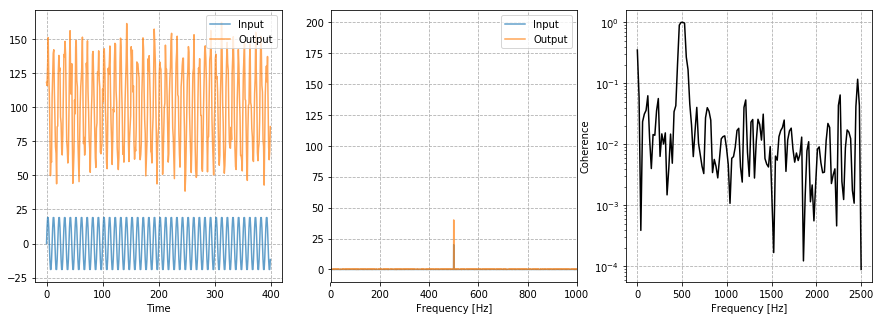

In [16]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from scipy.fftpack import fft

fs = 5e3 # sampling frequency
N = 10000 # number of observations
T = N/fs # max time T
amp = 20 # sine wave amplitude input
amp2 = 2*amp # sine wave amplitude output
freq = 500.0 # sine wave frequency input
freq2 = 500 # sine wave frequency output
time = np.arange(N) / fs # time vector t_0 up to T
# create data
x = amp*np.sin(2*np.pi*freq*time) # input
y = amp2*np.sin(2*np.pi*freq2*time)+np.random.normal(scale = 10, size = len(x)) + 100 # output

fig, axes = plt.subplots(1,3, figsize=(15,5))

# plot time signals
axes[0].plot(x[:400], label = 'Input', alpha = 0.7)
axes[0].plot(y[:400], label = 'Output', alpha = 0.7)
axes[0].legend()
axes[0].grid(linestyle='--')
axes[0].set_xlabel('Time')

# plot fft input
xfft = fft(x)
N = len(x) # number of sample points
T = 1 / fs # sample spacing
xfreq = np.linspace(0.0, 1.0/(2.0*T), N//2)
axes[1].plot(xfreq, 2.0/N * np.abs(xfft[0:N//2]), label = 'Input', alpha = 0.7)

# plot fft output
yfft = fft(y)
N = len(y) # number of sample points
T = 1 / fs # sample spacing
yfreq = np.linspace(0.0, 1.0/(2.0*T), N//2)
axes[1].plot(xfreq, 2.0/N * np.abs(yfft[0:N//2]), label ='Output', alpha = 0.7)
axes[1].legend()
axes[1].set_xlim(1,1000)
axes[1].grid(linestyle='--')
axes[1].set_xlabel('Frequency [Hz]')

# plot coherence:
f, Cxy = signal.coherence(x, y, fs)
axes[2].semilogy(f, Cxy, color='black')
axes[2].set_xlabel('Frequency [Hz]')
axes[2].set_ylabel('Coherence')
axes[2].grid(linestyle='--')

plt.show()

# Cross correlation vs Phase correlation

In [4]:
from scipy import signal

from matplotlib.ticker import ScalarFormatter, AutoMinorLocator
mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5
mpl.rcParams['font.size'] = 32
mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['figure.figsize'] = (7.2,4.45)
mpl.rcParams['axes.titlesize'] = 32
mpl.rcParams['axes.labelsize'] = 32
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.markersize'] = 6
mpl.rcParams['legend.fontsize'] = 13
mpl.rcParams['mathtext.fontset'] = 'stix'      
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['lines.linewidth'] = 3.5
mpl.rcParams['xtick.labelsize'] = 32
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['legend.fontsize'] = 32

def setup_axis(ax):
    ax.set_xlabel('')
    ax.yaxis.set_major_formatter(ScalarFormatter())
    ax.yaxis.major.formatter._useMathText = True
    ax.yaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.xaxis.set_minor_locator(  AutoMinorLocator(5))
    ax.tick_params(direction='out', length=12, 
                   width=2, 
                   grid_alpha=0.5)
    ax.tick_params(direction='out', which='minor', length=6, 
                   width=1, 
                   grid_alpha=0.5)
    ax.grid(True)

In [5]:


fig, ax = plt.subplots(figsize=(8,8))
ax.plot(t, s1, label='S1')
ax.plot(t, s2, label='S2')

Axis_x = [-length(s1)+1 : 1 : length(s1)-1];               
cross_corr = xcorr(s1,s2,'coeff');                       
figure(2); clf;
plot( Axe_x, coss_corr,'r');

SyntaxError: invalid syntax (<ipython-input-5-ef02921271df>, line 7)

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()


Cross-correlation error: 0.002534320520922426
time shift = 327
Phase-correlation error: 0.0005614182885357044


/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


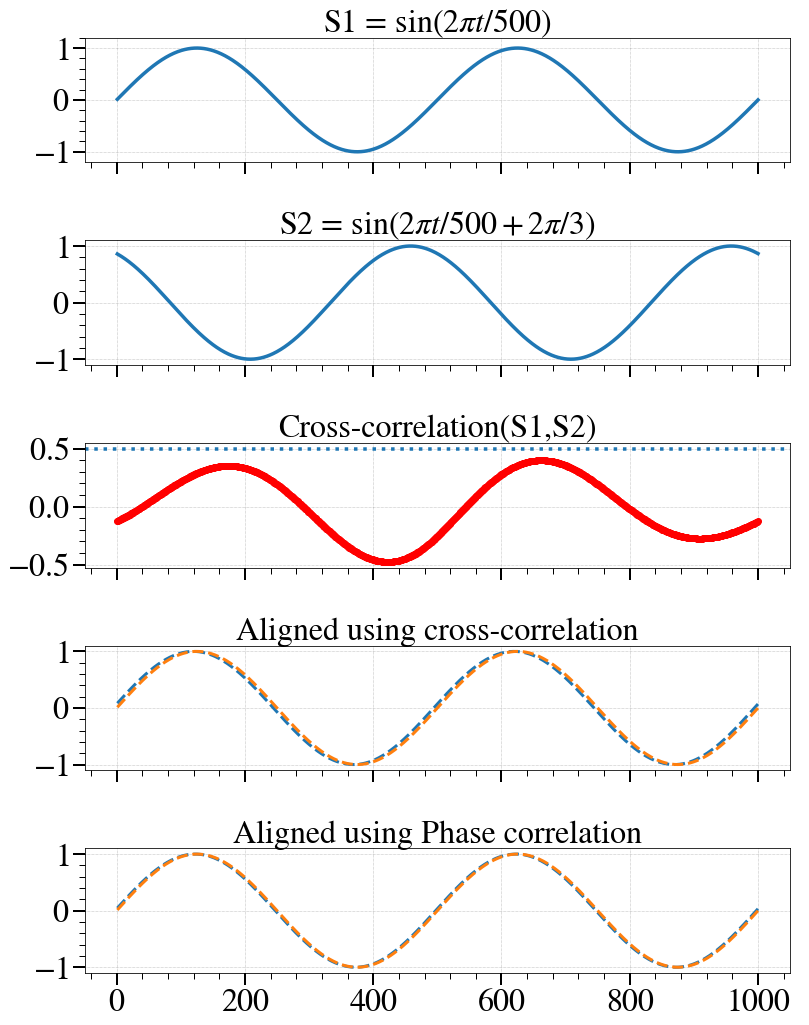

In [11]:
clock = np.arange(1, 1000+1)
phaseshift = 2*np.pi/3
s1 = np.sin(2*np.pi*clock/500)
s2 = np.sin(2*np.pi*clock/500 + phaseshift)

fig, axes = plt.subplots(5, 1, sharex=True, figsize=(12, 15))
setup_axis(axes[0])
setup_axis(axes[1])
setup_axis(axes[2])
setup_axis(axes[3])
setup_axis(axes[4])

axes[0].plot(clock, s1)
#ax_orig.plot(clock, sig[clock], 'ro')
axes[0].set_title('S1 = $\sin(2\pi t/500)$')
#ax_noise.plot(sig_noise)
corr = signal.correlate(s1, s2, mode='same') / len(clock)
axes[1].plot(clock, s2)
axes[1].set_title('S2 = $\sin(2\pi t/500 + 2\pi/3)$')
axes[2].plot(corr)
axes[2].plot(clock, corr[clock-1], 'ro')
axes[2].axhline(0.5, ls=':')
axes[2].set_title('Cross-correlation(S1,S2)')
axes[0].margins(0, 0.1)

lag = np.argmax(corr)
s2_sig = np.roll(s2, shift=int(np.ceil(lag)))
print( 'Cross-correlation error: {}'.format(np.mean((s2_sig - s1)**2)))
axes[3].plot(clock, s2_sig, linestyle='dashed', linewidth=3)
axes[3].plot(clock, s1, linestyle='dashed', linewidth=3)
axes[3].set_title('Aligned using cross-correlation')

fft_sig1 = np.fft.fft(s1)
fft_sig2 = np.fft.fft(s2)
fft_sig2_conj = np.conj(fft_sig2)

R = (fft_sig1 * fft_sig2_conj) / abs(fft_sig1 * fft_sig2_conj)
r = np.fft.ifft(R)

time_shift = np.argmax(r)
print('time shift = %d' % (time_shift))
s2_sig = np.roll(s2, shift=int(np.ceil(time_shift/2)))
print( 'Phase-correlation error: {}'.format(np.mean((s2_sig - s1)**2) ))
axes[4].plot(clock, s2_sig, linestyle='dashed', linewidth=3)
axes[4].plot(clock, s1, linestyle='dashed', linewidth=3)
axes[4].set_title('Aligned using Phase correlation')
fig.tight_layout()
fig.show()

fig.savefig('phase.png')

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


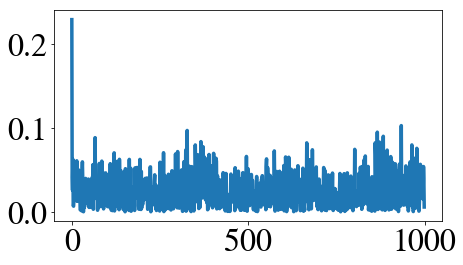

In [63]:
plt.plot(np.abs(r))

In [34]:
2*np.pi*lag/500

8.306370976091413

In [33]:
phaseshift

2.0943951023931953

In [39]:
def phase_correlation(a, b):
    G_a = np.fft.fft(a)
    G_b = np.fft.fft(b)
    conj_b = np.ma.conjugate(G_b)
    R = G_a*conj_b
    R /= np.absolute(R)
    r = np.fft.ifft(R).real
    return r

/home/cmb-panasas2/skchoudh/software_frozen/anaconda27/envs/riboraptor/lib/python3.5/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


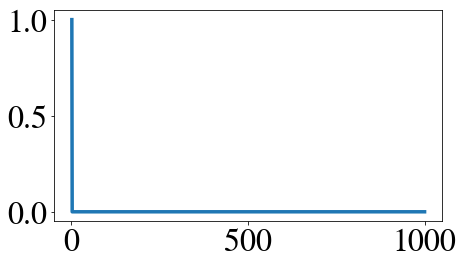

In [65]:
plt.plot(clock, phase_correlation(s1, s1))

time shift = 327


In [44]:
2*np.pi*327/1000

2.054601595447725

In [ ]:
#Do the correlation. x and y is the x and y components of your data (so I guess x is time and y is whatever you are modeling), template is what you are cross-correlating with
ycorr = scipy.correlate(y, template mode="full")

#Generate an x axis
xcorr = numpy.arange(ycorr.size)

#Convert this into lag units, but still not really physical
lags = xcorr - (y.size-1)
distancePerLag = (x[-1] - x[0])/float(x.size)  #This is just the x-spacing (or for you, the timestep) in your data

#Convert your lags into physical units
offsets = -lags*distancePerLag

In [ ]:
import colorsys
import numpy as np
from scipy.optimize import minimize
from scipy.interpolate import interp1d
from scipy.ndimage.interpolation import shift
from statsmodels.tsa.stattools import ccovf, ccf
from scipy import signal
import matplotlib.pyplot as plt

def align_spectra(reference, target, ROI, order=1,init=0.1,res=1,b=1):
    '''
        NH[0], NH[i]

        Aligns the target spectrum with in the region of interest (ROI) to the reference spectrum's ROI

        res - resolution of the data, only used if passing in higher resolution data and the initial value
        is given in native pixel coordinates not the high res coordinates

        b - symmetric bounds for constraining the shift search around the initial guess
    '''
    ROI[0] = int(ROI[0]*res)
    ROI[1] = int(ROI[1]*res)

    # ROI - region of interest to focus on computing the residuals for
    # LIMS - shifting limits
    reference = reference/np.mean(reference[ROI[0]:ROI[1]])

    # define objective function: returns the array to be minimized
    def fcn2min(x):
        # x = shift length
        shifted = shift(target,x,order=order)
        shifted = shifted/np.mean(shifted[ROI[0]:ROI[1]])
        return np.sum( ((reference - shifted)**2 )[ROI[0]:ROI[1]] )


    #result = minimize(fcn2min,init,method='Nelder-Mead')
    minb = min( [(init-b)*res,(init+b)*res] )
    maxb = max( [(init-b)*res,(init+b)*res] )
    result = minimize(fcn2min,init,method='L-BFGS-B',bounds=[ (minb,maxb) ])
    return result.x[0]/res


def phase_spectra(ref,tar,ROI,res=100):
    '''
        Cross-Correlate data within ROI with a precision of 1./res
        interpolate data onto higher resolution grid and
        align target to reference
    '''
    x,r1 = highres(ref[ROI[0]:ROI[1]],kind='linear',res=res)
    x,r2 = highres(tar[ROI[0]:ROI[1]],kind='linear',res=res)

    r1 -= r1.mean()
    r2 -= r2.mean()

    cc = ccovf(r1,r2,demean=False,unbiased=False)
    if np.argmax(cc) == 0:
        cc = ccovf(r2,r1,demean=False,unbiased=False)
        mod = -1
    else:
        mod = 1

    s1 = np.argmax(cc)*mod*(1./res)
    return s1

    # older method that behaves the same just uses more lines of code
    x,r1 = highres(ref[ROI[0]:ROI[1]],kind='linear',res=res)
    x,r2 = highres(tar[ROI[0]:ROI[1]],kind='linear',res=res)

    r1 -= r1.mean()
    r1 -= r2.mean()

    # compute the POC function
    product = np.fft.fft(r1) * np.fft.fft(r2).conj()
    cc = np.fft.fftshift(np.fft.ifft(product))

    l = ref[ROI[0]:ROI[1]].shape[0]
    shifts = np.linspace(-0.5*l,0.5*l,l*res)

    return shifts[np.argmax(cc.real)]


def highres(y,kind='cubic',res=100):
    # interpolate onto higher resolution grid with res* more data points than original input
    # from scipy import interpolate
    y = np.array(y)
    x = np.arange(0, y.shape[0])
    f = interp1d(x, y,kind='cubic')
    xnew = np.linspace(0, x.shape[0]-1, x.shape[0]*res)
    ynew = f(xnew)
    return xnew,ynew

def error(x,y):
    # basic uncertainty on poisson quantities of x and y for f(x,y) = x/y
    sigx = np.sqrt(x)
    sigy = np.sqrt(y)
    dfdx = 1./y
    dfdy = x/(y*y)

    er = np.sqrt( dfdx**2 * sigx**2 + dfdy**2 * sigy**2 )
    return er



if __name__ == "__main__":

    NPTS = 100
    SHIFTVAL = 4
    NOISE = 1e-3

    # generate some noisy data and simulate a shift
    x = np.linspace(0,4*np.pi,NPTS)
    y = signal.gaussian(NPTS, std=4) * np.random.normal(1,NOISE,NPTS)
    shifted = np.roll( signal.gaussian(NPTS, std=4) ,SHIFTVAL) * np.random.normal(1,NOISE,NPTS)
    # np roll can only do integer shifts

    # align the shifted spectrum back to the real
    s = phase_spectra(y, shifted, [10,190])
    print('phase shift value to align is',s)

    # chi squared alignment at native resolution
    s = align_spectra(y, shifted, [10,190],init=-4,b=1)
    print('chi square alignment',s)

    plt.plot(x,y,label='original data')
    plt.plot(x,shifted,label='shifted data')
    plt.plot(x,shift(shifted,s),label='aligned data') # use shift function to linearly interp data
    plt.legend(loc='best')
    plt.show()

In [1]:
NPTS = 100
SHIFTVAL = 4
NOISE = 1e-3

# generate some noisy data and simulate a shift
x = np.linspace(0,4*np.pi,NPTS)
y = signal.gaussian(NPTS, std=4) * np.random.normal(1,NOISE,NPTS)
shifted = np.roll( signal.gaussian(NPTS, std=4) ,SHIFTVAL) * np.random.normal(1,NOISE,NPTS)
# np roll can only do integer shifts

  

NameError: name 'np' is not defined

In [ ]:
  # align the shifted spectrum back to the real
    s = phase_spectra(y, shifted, [10,190])
    print('phase shift value to align is',s)

    # chi squared alignment at native resolution
    s = align_spectra(y, shifted, [10,190],init=-4,b=1)
    print('chi square alignment',s)

    plt.plot(x,y,'k-',label='original data')
    plt.plot(x,shifted,'r-',label='shifted data')
    plt.plot(x,shift(shifted,s),'o--',label='aligned data') # use shift function to linearly interp data
    plt.legend(loc='best')
    plt.show()